# Random Forest

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/EMG_Features.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

## división de los datos.

X = df.drop(columns=["Target"])
y = df["Target"]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42)

In [3]:
pipeline_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))   # o n_components=0.95 si quieres 95% varianza
])

X_train_pca = pipeline_pca.fit_transform(X_train)
X_val_pca = pipeline_pca.transform(X_val)
X_test_pca = pipeline_pca.transform(X_test)



=== RESULTADOS DE VALIDACIÓN ===
   n_estimators  accuracy  precision    recall  f1_score
0             1  0.865808   0.858875  0.864595  0.861726
1             5  0.908213   0.919540  0.887902  0.903444
2            10  0.920558   0.951981  0.880133  0.914648
3            20  0.917338   0.945173  0.880133  0.911494
4            50  0.922169   0.943662  0.892342  0.917285
5           100  0.924316   0.951306  0.889012  0.919105
6           200  0.924316   0.951306  0.889012  0.919105
7           300  0.923779   0.949112  0.890122  0.918671


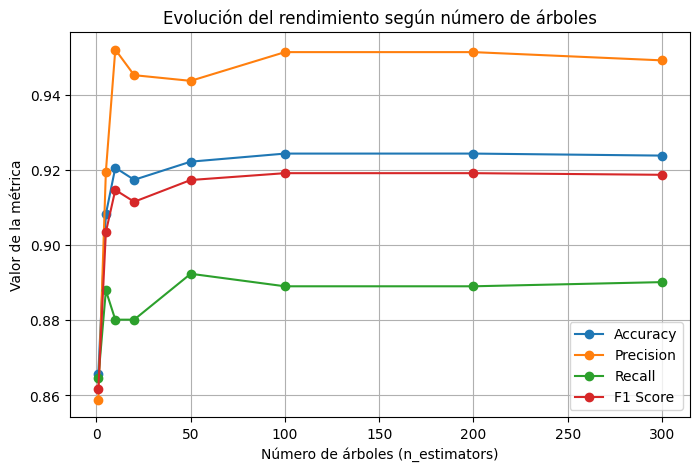

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Lista de números de árboles a probar
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300]

# Diccionario para guardar resultados
results = {
    "n_estimators": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

# Bucle de pruebas
for n in n_estimators_list:

    # Definir modelo con n árboles
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )

    # Entrenar
    model.fit(X_train_pca, y_train)

    # Predecir en validación
    y_val_pred = model.predict(X_val_pca)

    # Calcular métricas
    acc  = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val,y_val_pred)
    rec  = recall_score(y_val, y_val_pred)
    f1   = f1_score(y_val, y_val_pred)

    # Guardar resultados
    results["n_estimators"].append(n)
    results["accuracy"].append(acc)
    results["precision"].append(prec)
    results["recall"].append(rec)
    results["f1_score"].append(f1)

# Convertir a tabla
df_results = pd.DataFrame(results)
print("\n=== RESULTADOS DE VALIDACIÓN ===")
print(df_results)

# Graficar
plt.figure(figsize=(8, 5))

plt.plot(df_results["n_estimators"], df_results["accuracy"], marker='o', label="Accuracy")
plt.plot(df_results["n_estimators"], df_results["precision"], marker='o', label="Precision")
plt.plot(df_results["n_estimators"], df_results["recall"], marker='o', label="Recall")
plt.plot(df_results["n_estimators"], df_results["f1_score"], marker='o', label="F1 Score")

plt.title("Evolución del rendimiento según número de árboles")
plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Valor de la métrica")
plt.grid(True)
plt.legend()
plt.show()


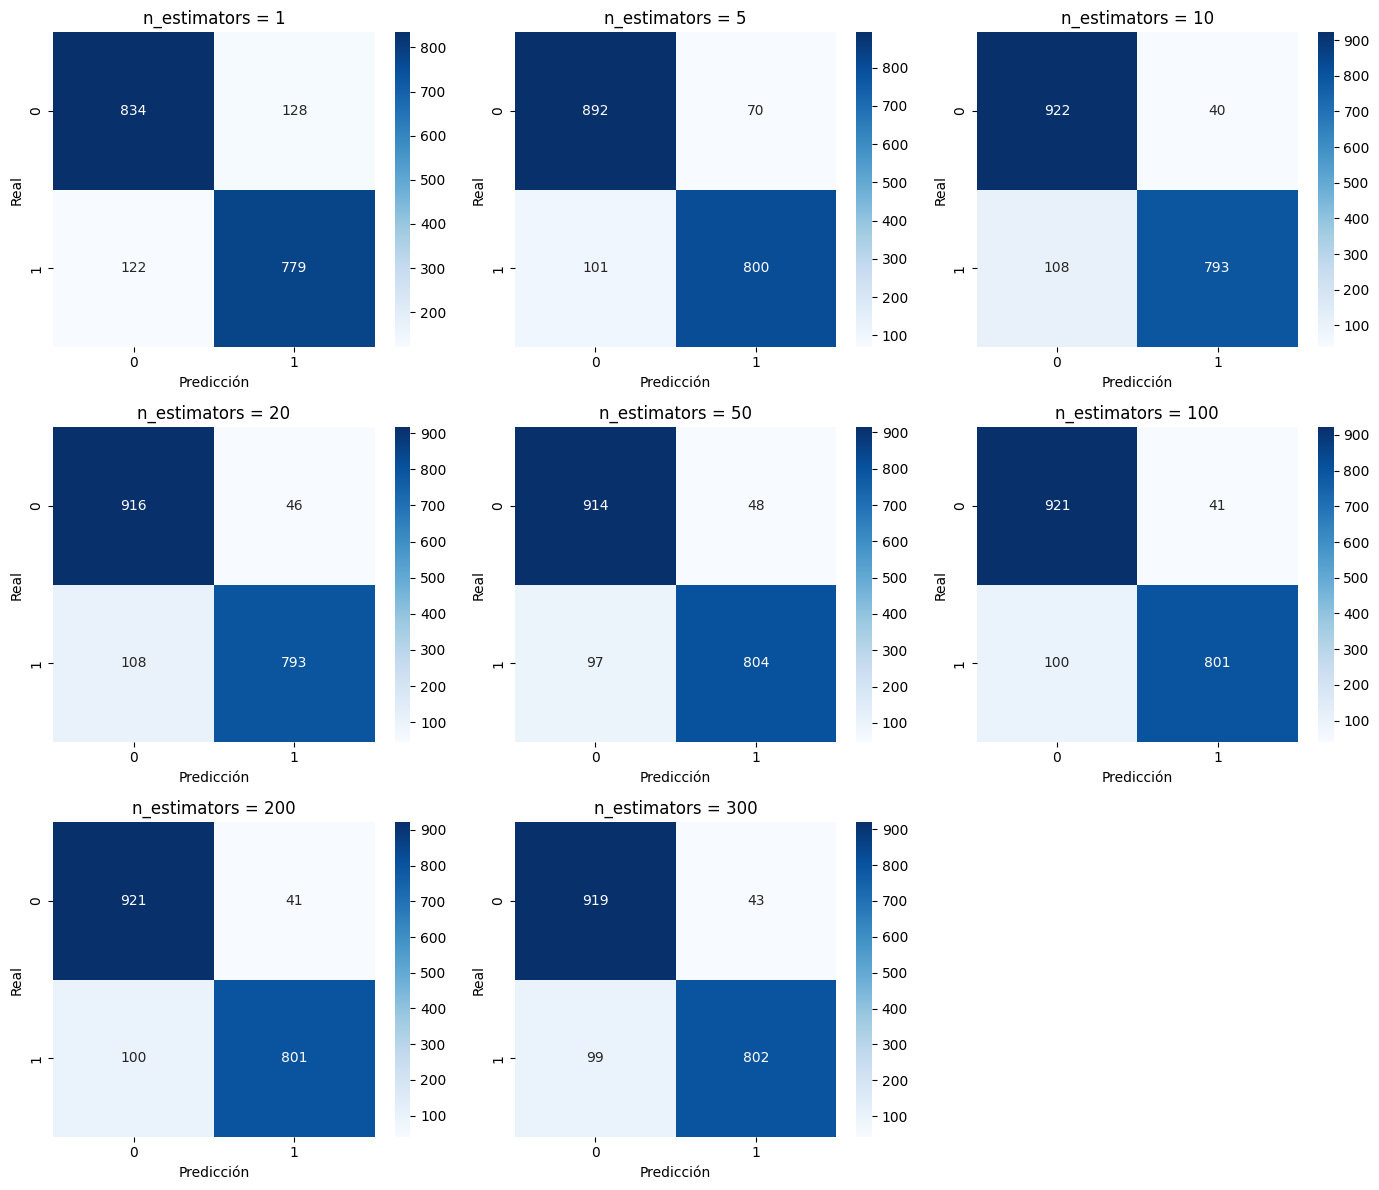

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de números de árboles a probar
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300]

# Guardamos resultados
confusion_results = {}

for n in n_estimators_list:

    # Definir modelo
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )

    # Entrenar
    model.fit(X_train_pca, y_train)

    # Predecir en validación
    y_val_pred = model.predict(X_val_pca)

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_val_pred)

    # Guardar matriz
    confusion_results[n] = cm


# =====================================================
#     MOSTRAR TODAS LAS MATRICES DE CONFUSIÓN
# =====================================================

num_models = len(n_estimators_list)
cols = 3
rows = (num_models + cols - 1) // cols

plt.figure(figsize=(14, 4 * rows))

for idx, n in enumerate(n_estimators_list):
    plt.subplot(rows, cols, idx + 1)
    sns.heatmap(confusion_results[n], annot=True, fmt='d', cmap='Blues')
    plt.title(f"n_estimators = {n}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")

plt.tight_layout()
plt.show()



--- TRAIN ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4495
         1.0       1.00      1.00      1.00      4197

    accuracy                           1.00      8692
   macro avg       1.00      1.00      1.00      8692
weighted avg       1.00      1.00      1.00      8692


--- VALIDACIÓN ---
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       962
         1.0       0.95      0.89      0.92       901

    accuracy                           0.92      1863
   macro avg       0.93      0.92      0.92      1863
weighted avg       0.93      0.92      0.92      1863


--- TEST ---
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93       924
         1.0       0.96      0.88      0.92       939

    accuracy                           0.92      1863
   macro avg       0.93      0.92      0.92      1863
weighted avg       0.93  

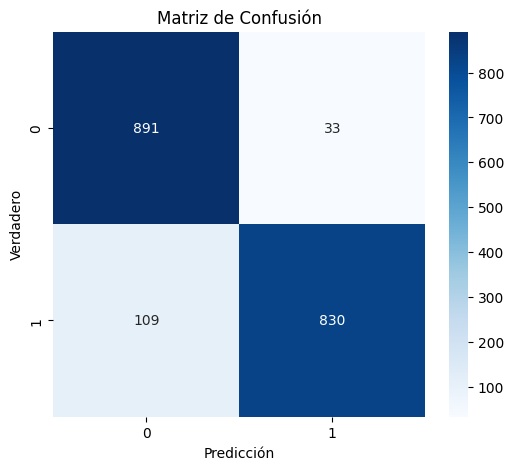

In [6]:
## entrenamiento con 200 árboles
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_pca, y_train)

pred_val = model.predict(X_val_pca)
pred_test = model.predict(X_test_pca)
pred_train= model.predict(X_train_pca)

## Métricas del modelo
print("\n--- TRAIN ---")
print(classification_report(y_train, pred_train))

print("\n--- VALIDACIÓN ---")
print(classification_report(y_val, pred_val))

print("\n--- TEST ---")
print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)

# Dibujar heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()



In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def evaluar_modelo_universal(modelo,
                             X_train, y_train,
                             X_val, y_val,
                             X_test, y_test,
                             nombre="Modelo",
                             threshold=0.5):
    """
    Evalúa cualquier modelo (Keras o sklearn) en train/val/test.

    - Si es Keras (tiene .evaluate):
        * loss, acc, auc se toman de model.evaluate (como antes).
    - Si es sklearn:
        * loss = None
        * acc y auc se calculan con sklearn.

    Para todos:
        * matriz de confusión
        * classification report
        * curva ROC
        * tabla horizontal Train | Val | Test
    """

    # Para guardar resultados por split
    res = {}

    # -------------------------------------------------
    # Helper: obtener probabilidades para cualquier modelo
    # -------------------------------------------------
    def _predict_proba(model, X):
        # Keras
        if "keras" in str(type(model)).lower():
            return model.predict(X, verbose=0).ravel()

        # sklearn con predict_proba
        if hasattr(model, "predict_proba"):
            return model.predict_proba(X)[:, 1]

        # sklearn con decision_function (ej: algunos SVM)
        if hasattr(model, "decision_function"):
            scores = model.decision_function(X)
            return 1 / (1 + np.exp(-scores))  # sigmoid

        raise ValueError("El modelo no soporta predict_proba ni decision_function.")

    # -------------------------------------------------
    # Helper: evaluar un conjunto
    # -------------------------------------------------
    def _eval_split(X, y, split_name):
        print(f"\n================ {split_name} ================")

        es_keras = hasattr(modelo, "evaluate") and "keras" in str(type(modelo)).lower()

        loss = None
        acc = None
        auc_value = None

        # 1) Si es Keras: usar evaluate para loss/acc/auc
        if es_keras:
            eval_out = modelo.evaluate(X, y, verbose=0)
            # asumo métricas: [loss, accuracy, auc] en ese orden
            if isinstance(eval_out, (list, tuple)) and len(eval_out) >= 3:
                loss, acc, auc_value = eval_out[:3]
            else:
                # por si solo hay loss y acc
                loss = eval_out[0]
                acc = eval_out[1] if len(eval_out) > 1 else None

        # 2) Probabilidades y métricas comunes (sklearn)
        y_proba = _predict_proba(modelo, X)
        y_pred = (y_proba >= threshold).astype(int)

        # Si accuracy no vino de Keras, la calculamos
        if acc is None:
            acc = accuracy_score(y, y_pred)

        # Si AUC no vino de Keras, lo calculamos
        if auc_value is None:
            fpr, tpr, _ = roc_curve(y, y_proba)
            auc_value = auc(fpr, tpr)
        else:
            # Igual calculamos fpr/tpr para la curva ROC
            fpr, tpr, _ = roc_curve(y, y_proba)

        print("\n Classification Report:")
        print(classification_report(y, y_pred, digits=4))

        cm = confusion_matrix(y, y_pred)
        print("\n Matriz de confusión:")
        print(cm)

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Pred 0", "Pred 1"],
                    yticklabels=["Real 0", "Real 1"])
        plt.title(f"{nombre} - {split_name}")
        plt.tight_layout()
        plt.show()

        return {
            "loss": loss,
            "acc": acc,
            "auc": auc_value,
            "cm": cm,
            "fpr": fpr,
            "tpr": tpr
        }

    # --------- evaluar los 3 conjuntos ----------
    res["train"] = _eval_split(X_train, y_train, "TRAIN")
    res["val"]   = _eval_split(X_val,   y_val,   "VALIDACIÓN")
    res["test"]  = _eval_split(X_test,  y_test,  "TEST")

    # --------- tabla horizontal ----------
    tabla = pd.DataFrame({
        "Train": {
            "Loss":     res["train"]["loss"],
            "Accuracy": res["train"]["acc"],
            "AUC":      res["train"]["auc"],
        },
        "Validación": {
            "Loss":     res["val"]["loss"],
            "Accuracy": res["val"]["acc"],
            "AUC":      res["val"]["auc"],
        },
        "Test": {
            "Loss":     res["test"]["loss"],
            "Accuracy": res["test"]["acc"],
            "AUC":      res["test"]["auc"],
        }
    })

    print("\n RESUMEN HORIZONTAL (TRAIN | VAL | TEST)")
    display(tabla)

    # --------- ROC combinada ----------
    plt.figure(figsize=(7, 6))
    plt.plot(res["train"]["fpr"], res["train"]["tpr"],
             label=f"Train (AUC={res['train']['auc']:.3f})")
    plt.plot(res["val"]["fpr"], res["val"]["tpr"],
             label=f"Val (AUC={res['val']['auc']:.3f})")
    plt.plot(res["test"]["fpr"], res["test"]["tpr"],
             label=f"Test (AUC={res['test']['auc']:.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.legend()
    plt.title(f"Curva ROC – {nombre}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return tabla, res


================ TRAIN ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000      4495
         1.0     1.0000    1.0000    1.0000      4197

    accuracy                         1.0000      8692
   macro avg     1.0000    1.0000    1.0000      8692
weighted avg     1.0000    1.0000    1.0000      8692


 Matriz de confusión:
[[4495    0]
 [   0 4197]]


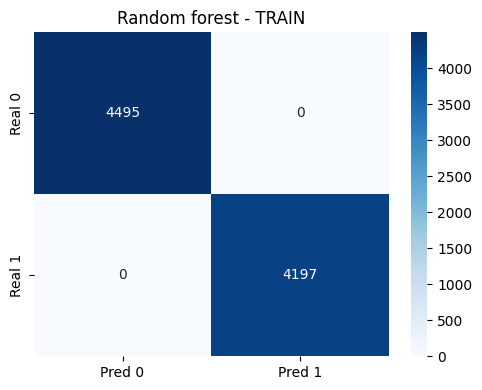


================ VALIDACIÓN ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.9027    0.9543    0.9277       962
         1.0     0.9480    0.8901    0.9181       901

    accuracy                         0.9232      1863
   macro avg     0.9253    0.9222    0.9229      1863
weighted avg     0.9246    0.9232    0.9231      1863


 Matriz de confusión:
[[918  44]
 [ 99 802]]


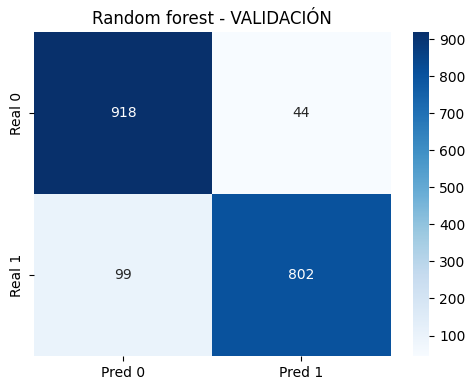


================ TEST ================

 Classification Report:
              precision    recall  f1-score   support

         0.0     0.8919    0.9643    0.9267       924
         1.0     0.9618    0.8850    0.9218       939

    accuracy                         0.9243      1863
   macro avg     0.9268    0.9246    0.9242      1863
weighted avg     0.9271    0.9243    0.9242      1863


 Matriz de confusión:
[[891  33]
 [108 831]]


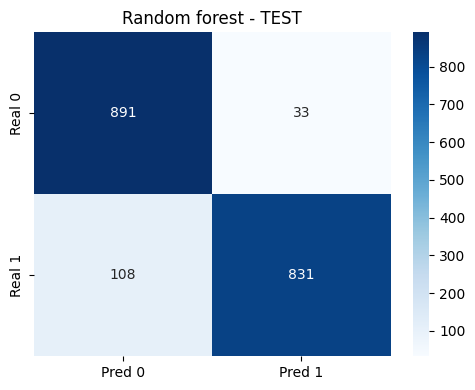


 RESUMEN HORIZONTAL (TRAIN | VAL | TEST)


,Train,Validación,Test
Loss,NaN,NaN,NaN
Accuracy,1.0,0.923242,0.924316
AUC,1.0,0.969855,0.966650


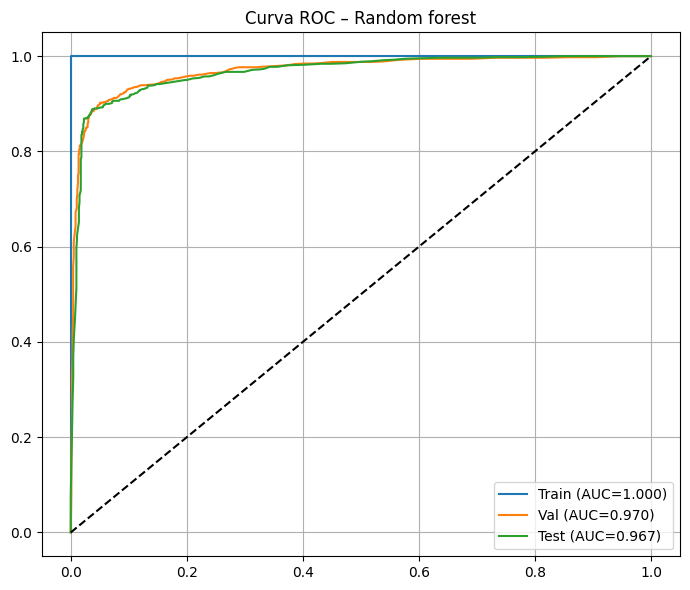

In [9]:
resultados, tabla = evaluar_modelo_universal(
    model,
    X_train_pca, y_train,
    X_val_pca,   y_val,
    X_test_pca, y_test,
    nombre="Random forest",
    threshold=0.5
)